This project aims to predict the movement of assets based on quantitative analysis and machine learning. This is an ongoing project. Data is collected from tdameritrade api, https://developer.tdameritrade.com.  Quantitative analysis techniques will be used to make predictions and then compared with machine learning techniques. 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from datetime import datetime
import requests
from api_key import api_key # api_key was saved in an api_key.py file

In [ ]:
# creating api url request
symbol = input().upper()
url = 'https://api.tdameritrade.com/v1/marketdata/{}/pricehistory'.format(symbol)

# refer to tdameritrade documentation for parameters.
payload = {'apikey': api_key,
          'periodType': 'year',
          'period': '20',
          'frequencyType': 'daily',
          'frequency': '1'}

In [67]:
# retrieving historically price
rawData = requests.get(url, payload)

In [68]:
# dumping data into json format
rawData_json = rawData.json()
rawData_json.keys()

dict_keys(['candles', 'symbol', 'empty'])

In [69]:
# loading json dictionary into a dataframe
rawData_df = pd.json_normalize(rawData_json, 'candles')

In [70]:
rawData_df

,open,high,low,close,volume,datetime
0,0.299821,0.308393,0.293214,0.304643,251658400,1025154000000
1,0.305357,0.318214,0.303571,0.316429,269858400,1025240400000
2,0.316250,0.319286,0.304464,0.304643,222689600,1025499600000
3,0.304107,0.306429,0.300536,0.302500,305188800,1025586000000
4,0.300179,0.315714,0.299107,0.313393,199029600,1025672400000
...,...,...,...,...,...,...
5030,133.420000,137.060000,133.320000,135.870000,81000488,1655787600000
5031,134.790000,137.760000,133.910000,135.350000,73409234,1655874000000
5032,136.820000,138.590000,135.630000,138.270000,72433768,1655960400000
5033,139.900000,141.910000,139.770000,141.660000,89116837,1656046800000


In [71]:
# converting miliseconds to datetime format. Also add additional day to get current date.
def daily_datetime(data):
    df=data
    df['datetime'] = df['datetime'].map(lambda x: datetime.fromtimestamp((x + 86400000) / 1000))
    df['datetime'] = df['datetime'].map(lambda x: datetime.strptime(str(x).split(' ')[0], '%Y-%m-%d'))
    return df

In [72]:
cleaned_data = daily_datetime(rawData_df)
cleaned_data

,open,high,low,close,volume,datetime
0,0.299821,0.308393,0.293214,0.304643,251658400,2002-06-27
1,0.305357,0.318214,0.303571,0.316429,269858400,2002-06-28
2,0.316250,0.319286,0.304464,0.304643,222689600,2002-07-01
3,0.304107,0.306429,0.300536,0.302500,305188800,2002-07-02
4,0.300179,0.315714,0.299107,0.313393,199029600,2002-07-03
...,...,...,...,...,...,...
5030,133.420000,137.060000,133.320000,135.870000,81000488,2022-06-21
5031,134.790000,137.760000,133.910000,135.350000,73409234,2022-06-22
5032,136.820000,138.590000,135.630000,138.270000,72433768,2022-06-23
5033,139.900000,141.910000,139.770000,141.660000,89116837,2022-06-24


<BarContainer object of 5035 artists>

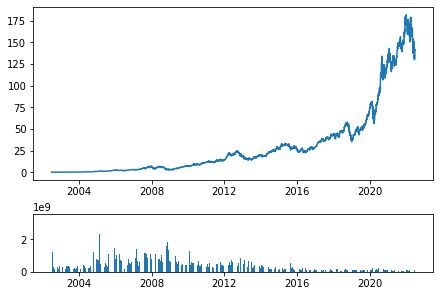

In [74]:
# plot using matplotlib 
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
gs = gridspec.GridSpec(4,4, fig)
ax_price = fig.add_subplot(gs[:3,:])
ax_vol = fig.add_subplot(gs[3,:])

x = cleaned_data['datetime']
y_price = cleaned_data['close']
y_vol = cleaned_data['volume']

ax_price.plot(x,y_price)
ax_vol.bar(x,y_vol)